#Testing for diabetes
#'1' represent positive
#'0' represents negative
#User willl enter values of thier choice and the model will predict whether the have diabetes or not

In [ ]:
#importing some of the libraries to be used
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

NB: To run this code there needs to be a file called 'diabetes.csv' on the loacal storage

In [ ]:
#uploading the data from the local storage and printing the first five rows
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('diabetes.csv')
df.head()

Saving diabetes.csv to diabetes.csv


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
#Correlations of the columns
df.iloc[:,:].corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


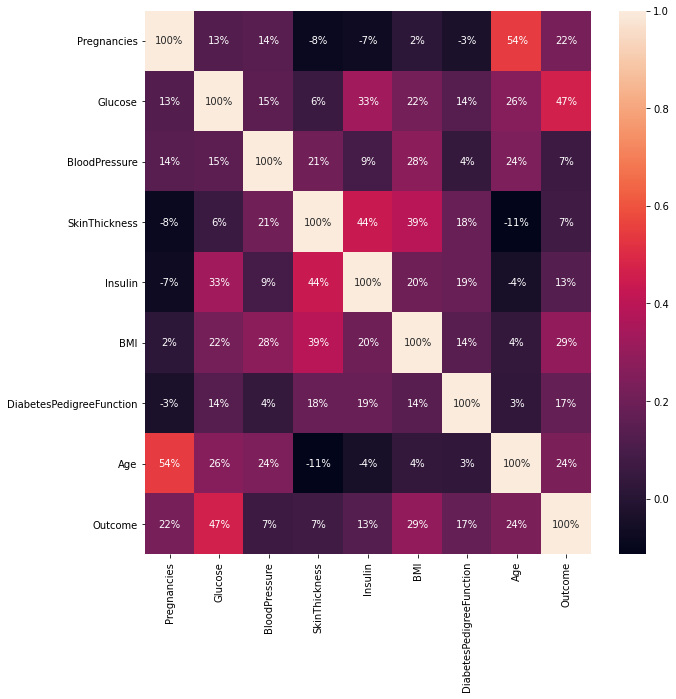

In [30]:
#Visualization of the correlation
plt.figure(figsize=(10,10))
sn.heatmap(df.iloc[:,:].corr(),annot=True, fmt= '.0%')

In [ ]:
#Indices of the features
X = df.iloc[:,0:31].values
Y = df.iloc[:,8].values

In [ ]:
#split the data into 70% training and 30% testing
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size = .30, random_state=0)

In [ ]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [ ]:
#model configuration
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(12, input_dim=9, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
#compling the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
#Training the model
history = model.fit(X_train, Y_train, epochs=5, batch_size=150, verbose=5)

Epoch 1/5
Epoch 2/5
Epoch 3/5
Epoch 4/5
Epoch 5/5


dict_keys(['loss', 'accuracy'])


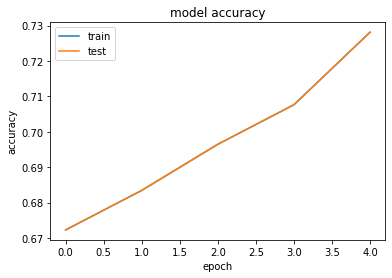

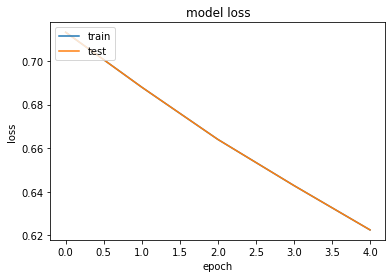

In [ ]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#predictions
predictions = model.predict_classes(X_train)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
#predictionss on the first 5 rows of the training dataset
for i in range(5):
	print('%s => %d (expected %d)' % (X_train[i].tolist(), predictions[i], Y_train[i]))

[-1.1331154278766307, 0.9144384973692665, 1.0455934611444673, 1.5589999133319745, -0.7165233540987432, 1.226468529856249, -0.3002719004479832, -1.0565447943624737, 1.3296771176166782] => 0 (expected 1)
[-0.8391622951376208, -1.196551271876917, -0.08570438206102217, -1.3131969735360471, -0.7165233540987432, -1.7509777131184039, 0.4569905116912262, -0.5562233176670165, -0.7520622764362552] => 0 (expected 0)
[-0.5452091623986107, 0.014163448720158912, 0.01714087641220414, 0.3726577209299656, -0.7165233540987432, 0.5661980240919949, -0.3930589944255147, -0.5562233176670165, -0.7520622764362552] => 0 (expected 0)
[0.04269710307940926, 0.7592186613952825, 0.4285219103051094, -1.3131969735360471, -0.7165233540987432, 0.7779829032993973, 0.14570477705692675, 2.779253193636031, 1.3296771176166782] => 0 (expected 1)
[-1.1331154278766307, 0.04520741591495572, 0.11998613488543046, -1.3131969735360471, -0.7165233540987432, 0.5039083537368766, -0.6384958236564047, 1.5284495018973883, 1.3296771176166

In [ ]:
#predictionss on the first 5 rows of the testing dataset
for i in range(5):
	print('%s => %d (expected %d)' % (X_test[i].tolist(), predictions[i], Y_test[i]))

[-0.8590481467456988, 2.544769151227464, 0.4307030500457463, 1.5032839252408083, -0.6402986708972158, 1.538104271396293, 2.8415203291254048, -0.9217873835334534, 1.4565787385588245] => 0 (expected 1)
[-0.554692131564324, -0.39587757825359016, 0.3256424327695399, 0.6757199238662626, 0.3021569999149217, 0.29616282727065957, -0.21344264460287046, -0.8317903904665778, -0.6865402971551148] => 0 (expected 0)
[0.05401989879842588, -1.3867476718830758, -0.3047212708876986, -1.2340431562288432, -0.6402986708972158, 0.34957966357713827, -0.2535583200154638, -0.6517964043328265, -0.6865402971551148] => 0 (expected 0)
[0.3583759139798008, 1.489971954783173, 0.22058181549333347, -0.024526538835276203, 1.0089987530240248, -0.7454654807056785, 0.3512626323590231, 1.68812541540594, 1.4565787385588245] => 0 (expected 1)
[-1.1634041619270736, -0.26802337262397913, -0.14713034497338898, -1.2340431562288432, -0.6402986708972158, -0.9057159896251151, 0.5765275789066634, -0.11181444593157273, -0.68654029715

In [ ]:
#evaluating the model
accuracy = model.evaluate(X_test, Y_test)
print(accuracy)

8/8 [==============================] - 0s 2ms/step - loss: 0.6228 - accuracy: 0.7403
[0.622817873954773, 0.7402597665786743]




*This part of the code is for testing from the user and it Ipywidgets for visualizations. IntSliders are used intead of the user having to input values in an input box.*

In [ ]:
#Creating python lists on the columns of the data
import ipywidgets as wg
from IPython.display import display

n = int(input('Number of records:'))
Pregnancies = []
Glucose = []
BloodPressure = []
SkinThickness = []
Insulin = []
BMI = []
Age = []
DiabetesPedigreeFunction = []

for i in range(n):
    
    pregnancies = wg.IntSlider(max=10)
    l1 = wg.Label('Pregnancies')
    display(pregnancies, l1)
    
    
    
   
    glucose = wg.IntSlider(max=300)
    l2 = wg.Label('Glucose')
    display(glucose,l2)
   
   
    bloodPressure = wg.IntSlider(max=100)
    l3 = wg.Label('Bloood Pressure')
    display(bloodPressure, l3)
    
    
    skinThickness = wg.IntSlider(max=100)
    l4 = wg.Label('Skin Thickness')
    display(skinThickness, l4)
    
    
    insulin = wg.IntSlider(max=100)
    l5 = wg.Label('Insulin')
    display(insulin, l5)
    
    
    bmi = wg.IntSlider(max=100)
    l6 = wg.Label('BMI')
    display(bmi, l6)
    
   
    
   
    diabetesPedigreeFunction = wg.FloatSlider(max = 10.0)
    l7 =wg.Label('DiabetesPedigreeFunction')
    display(diabetesPedigreeFunction, l7)
    
    
    
    age = wg.IntSlider(max=100)
    l8 = wg.Label('Age')
    display(age, l8)
    

    print('---------------------------------------------')

    Pregnancies.append(pregnancies)
    Glucose.append(glucose)
    BloodPressure.append(bloodPressure)
    SkinThickness.append(skinThickness )
    Insulin.append(insulin )
    BMI.append(bmi)
    Age.append(age)
    



Number of records:1


IntSlider(value=0, max=10)

Label(value='Pregnancies')

IntSlider(value=0, max=300)

Label(value='Glucose')

IntSlider(value=0)

Label(value='Bloood Pressure')

IntSlider(value=0)

Label(value='Skin Thickness')

IntSlider(value=0)

Label(value='Insulin')

IntSlider(value=0)

Label(value='BMI')

FloatSlider(value=0.0, max=10.0)

Label(value='DiabetesPedigreeFunction')

IntSlider(value=0)

Label(value='Age')

---------------------------------------------


In [ ]:
#Convering the user input into dataframe
a = {'Pregnancies': pregnancies.value, 'Glucose':glucose.value,' BloodPressure': bloodPressure.value,' SkinThickness': skinThickness.value,'Insulin':insulin.value,' BMI': bmi.value,'Age':Age}
b = pd.DataFrame(a)
c = np.array(b)
print(b)

   Pregnancies  Glucose   BloodPressure  ...  Insulin   BMI                  Age
0           10      159              45  ...       40    45  IntSlider(value=57)

[1 rows x 7 columns]


In [ ]:
#Results
btn = wg.Button(description ='Results',disabled=False,button_style='info',tooltip='Results')
out = wg.Output()
display(btn,out)
def on_btn_clk(b):
    with out:
        for i in range(n):
	          print('%d (expected %d)' % (predictions[i], Y_test[i]))
btn.on_click(on_btn_clk)

Button(button_style='info', description='Results', style=ButtonStyle(), tooltip='Results')

Output()